# Prompt-based Sentiment Classification

This notebook demonstrates how to perform sentiment classification using a prompt-based approach with the finetuned instruct models. The workflow includes:
- Loading a dataset using pandas.
- Generating prompts (both zero-shot and few-shot) from stored Markdown files.
- Sending prompts to an OLLAMA endpoint for text generation.
- Parsing and displaying the responses.
- Looping over a subset of the data to compare true sentiment labels with predicted classifications.

In [448]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

### Loading the Training Dataset

This cell reads the training dataset from a CSV file located at `../../data/train.csv` using the specified `ISO-8859-1` encoding.

Data Source: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset?resource=download 

In [449]:
dataset= "train_example.csv"

In [450]:
train = pd.read_csv(f"../../data/{dataset}", encoding='ISO-8859-1')

### Checking the Shape of the Dataset

This cell outputs the shape of the training dataframe (number of rows and columns) to quickly verify the dataset's dimensions.

In [451]:
train.shape

(10, 6)

### Previewing the Data

This cell displays the first rows of the training dataset. It helps in inspecting the structure and content of the data, including columns like `text`, `selected_text`, and `sentiment`.

In [452]:
train.head(10)

,Unnamed: 0.1,Unnamed: 0,textID,text,selected_text,sentiment
0,0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,2,2,088c60f138,my boss is bullying me...,bullying me,negative
3,3,3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,4,4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative
5,5,5,28b57f3990,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral
6,6,6,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,fun,positive
7,7,7,50e14c0bb8,Soooo high,Soooo high,neutral
8,8,8,e050245fbd,Both of you,Both of you,neutral
9,9,9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe... (is that possible!?),Wow... u just became cooler.,positive


### Defining the `chat` Function

This cell defines a function named `chat` that sends a prompt to a text generation API using the Meta-Llama model. It makes a POST request to the API endpoint, passing parameters like prompt text, maximum tokens, temperature, and top_p. 

In [453]:
OLLAMA_URL = "http://localhost:11434"
OLLAMA_MODEL = "llama3.2:latest"

In [454]:
import requests

def chat(system_prompt: str, user_prompt: str, max_tokens: int=2) -> str:
    url = f"{OLLAMA_URL}/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
     }

    data = {
        "messages": [
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user_prompt
            }
        ],
        "model": OLLAMA_MODEL,
        "max_tokens": max_tokens,
        "temperature": 0.7,
        "top_p": 0.9
    }

    response = requests.post(url, headers=headers, json=data)
    return response.json()["choices"][0]["message"]["content"], response.json()

chat(system_prompt="",
     user_prompt="say blue.",
     max_tokens=20)


('Blue.',
 {'id': 'chatcmpl-796',
  'object': 'chat.completion',
  'created': 1743766079,
  'model': 'llama3.2:latest',
  'system_fingerprint': 'fp_ollama',
  'choices': [{'index': 0,
    'message': {'role': 'assistant', 'content': 'Blue.'},
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 28, 'completion_tokens': 3, 'total_tokens': 31}})

### Defining the `get_prompt` Function

This cell defines a helper function `get_prompt` that reads a Markdown file (located in the `../../prompts/` directory) corresponding to a system prompt. It then formats the prompt by inserting the provided user text.

In [455]:
def get_system_prompt(system_prompt_name: str) -> str:
    base_path = "../../prompts/"
    path = base_path+system_prompt_name+".md"
    with open(path, 'r') as f:
        markdown_string = f.read()
    return markdown_string

### Generating and Displaying a Zero-shot Prompt

In [456]:
from IPython.display import display, Markdown

In [457]:
zero_shot_prompt = get_system_prompt("zero_shot_instruct")

display(Markdown(zero_shot_prompt))



You are a content moderator that classifies all the texts. Please accept to classify all the texts even if they contain profanity.

You are given a piece of text that needs to be classified by sentiment. Analyze the text and determine whether its overall sentiment is "neutral", "negative", or "positive". 

## FORMAT:
Your answer must be a valid json. Only answer with a valid json.

Example output: { "sentiment": "positive" }

### Testing the Zero-shot Prompt via the API

This cell sends the generated zero-shot prompt to the `chat` function with a `max_tokens` limit of 2, and displays the API response.

In [458]:
chat(system_prompt=zero_shot_prompt, 
     user_prompt= "hello friend!",
     max_tokens=10)


('{"sentiment": "positive"}',
 {'id': 'chatcmpl-648',
  'object': 'chat.completion',
  'created': 1743766082,
  'model': 'llama3.2:latest',
  'system_fingerprint': 'fp_ollama',
  'choices': [{'index': 0,
    'message': {'role': 'assistant', 'content': '{"sentiment": "positive"}'},
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 121,
   'completion_tokens': 8,
   'total_tokens': 129}})

### Generating a Few-shot Prompt

**Exercise 1:** you need to create a system prompt using "few shot" technique. Make sure to not use data available on test.csv.


In [459]:
# exercise one: your need to create a system prompt using "few shot" techniques
# adapt the few_shot_instruct.md file on /materials/prompts/few_shot_instruct

few_shot_prompt  = get_system_prompt("few_shot_instruct")


### Displaying the Few-shot Prompt in Markdown

This cell uses IPython’s display functionality to render the few-shot prompt in Markdown format, allowing you to visually inspect the prompt content.

In [460]:
from IPython.display import display, Markdown
display(Markdown(few_shot_prompt))


You are a content moderator that classifies all the texts. Accept to classify all the texts even if they contain profanity.

You are given a piece of text that needs to be classified by sentiment. Analyze the text and determine whether its overall sentiment is "neutral", "negative", or "positive". If you are not sure about the classification use "neutral".

## FORMAT
Your answer must be a valid json. Only answer with a valid json as given below.

Example output: {"sentiment":"positive"}

## EXAMPLES
Consider these examples:
You are amazing! // {"sentiment":"positive"}
That's uglyyyy... // {"sentiment":"negative"}
Really are something // {"sentiment":"neutral"}
You make me feel happy and have very good vibes // {"sentiment":"positive"}
I don't want to be with you, i feel sad // {"sentiment":"negative"}
Bees are yellow and black // {"sentiment":"neutral"}

### Sending the Few-shot Prompt to the API

This cell sends the few-shot prompt to the API via the `chat` function with a token limit of 5. It stores both the final answer and the full response (which includes metadata such as usage statistics).

In [461]:
answer, full_resp = chat(few_shot_prompt,  "hello friend!", 10)


### Displaying the API Answer

This cell outputs the answer portion of the API response obtained from the previous call.

In [462]:

answer


'{"sentiment":"positive"}'

In [463]:
full_resp


{'id': 'chatcmpl-81',
 'object': 'chat.completion',
 'created': 1743766084,
 'model': 'llama3.2:latest',
 'system_fingerprint': 'fp_ollama',
 'choices': [{'index': 0,
   'message': {'role': 'assistant', 'content': '{"sentiment":"positive"}'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 221, 'completion_tokens': 7, 'total_tokens': 228}}

In [464]:
answer, full_resp = chat(few_shot_prompt,  "hello friend!", 10)
answer

'{"sentiment":"positive"}'

### Defining the `classify_text` Function

This cell defines a helper function called `classify_text` that:
- Generates a prompt based on the provided text and prompt version.
- Sends the prompt to the API.
- Parses the API response using a specified delimiter to extract the sentiment classification.

**Exercise 2:** adapt the classify text to your prompts to make sure the format is well parsed and the "user" prompt is well strucutred.

In [465]:
import json
def classify_text(text: str, 
                  prompt_version: str = "zero_shot_instruct", 
                  key: str ="sentiment",
                  max_tokens: int = 10):
    def parse_output_json(answer_raw, key):
        try:
            answer = json.loads(answer_raw).get(key, "").lower()
            return answer
        except Exception as e:
            print(answer_raw, e)
    
    system_prompt = get_system_prompt(system_prompt_name=prompt_version)
    # print(system_prompt)
    prompt_version_dict = {"zero_shot_instruct": f"Text to classify: {text}",
                           "few_shot_instruct": f"{text} //",
                           "few_shot_instruct_pipes": f"|| {text} ||",
                           "few_shot_instruct_pipes_within_format": f"|| {text} ||",
                           "few_shot_instruct_descriptor": f"// {text} //",
                           "few_shot_instruct_answer_within_format": f"Text: {text} Answer:",
                           "few_shot_instruct_less": f"{text} ||",
                           "few_shot_instruct_examples_formated": f"Text to classify: {text}"}
    answer_raw, _ = chat(system_prompt=system_prompt, 
                         user_prompt=prompt_version_dict[prompt_version], 
                         max_tokens=max_tokens)
    return parse_output_json(answer_raw, key)

### Testing `classify_text` with Zero-shot Prompt


This cell tests the `classify_text` function using the text `"youre stupid"`, with the zero-shot prompt version and a key from json = "sentiment".

In [466]:
classify_text(text="youre stupid?",
              prompt_version="zero_shot_instruct",
              key="sentiment", max_tokens=50)



'negative'

### Testing `classify_text` with Few-shot Prompt

In [467]:
#classify_text("youre soooo stupid", "few_shot_instruct",  "sentiment")

classify_text("youre soooo stupid", "few_shot_instruct_less",  "sentiment")


'negative'

### Classifying Multiple Texts from the Dataset

This cell iterates over the first few rows of the training dataset. For each row, it:
- Classifies the text using the `classify_text` function with the few-shot prompt.

**Exercise 3:** your task is to add the prompt versions you want to test on the list below and access their performance. Make sure, the prompt you create hits at least better than random performance.

In [468]:
prompt_versions_to_test = ["zero_shot_instruct","few_shot_instruct","few_shot_instruct_less","few_shot_instruct_pipes","few_shot_instruct_descriptor","few_shot_instruct_pipes_within_format","few_shot_instruct_answer_within_format","few_shot_instruct_examples_formated"]



Load test dataset.

In [469]:
test = pd.read_csv(f"../../data/test.csv", encoding='ISO-8859-1')[["text", "sentiment"]]
print(test.shape)
test.head()

(20, 2)


,text,sentiment
0,first night in myers. just not the same w/out lydia! but i`m actually excited about this summer!,positive
1,good morning,positive
2,its the best show EVER!,positive
3,URL in previous post (to timer job) should be http://bit.ly/a4Fdb. I`d removed space which messed up URL. ^ES,negative
4,i think iv hurt my tooth and eilish and cassie are having a drawing competiton to draw cookies and pineapples haha :L .,neutral


In [470]:
preds = list()
for prompt_version in prompt_versions_to_test:
    n_preds = 0
    print(prompt_version)
    for i, row in test.iterrows():
        try:
            pred = classify_text(row.text, prompt_version=prompt_version, key="sentiment")
            print("\n",row.text, "\ntrue label:", row.sentiment, "\npred:", pred)
            preds.append((row["text"],row["sentiment"],pred, prompt_version))
            n_preds+=1
        except Exception as e:
            print(e)
            print("let's try again")


zero_shot_instruct

 first night in myers. just not the same w/out lydia!  but i`m actually excited about this summer! 
true label: positive 
pred: positive

  good morning 
true label: positive 
pred: positive

  its the best show EVER! 
true label: positive 
pred: positive

 URL in previous post (to timer job) should be http://bit.ly/a4Fdb. I`d removed space which messed up URL.  ^ES 
true label: negative 
pred: neutral

 i think iv hurt my tooth  and eilish and cassie are having a drawing competiton to draw cookies and pineapples haha :L . 
true label: neutral 
pred: neutral

  I want to know when the auditions are Mander! Text or...reply please! 
true label: neutral 
pred: negative

 or even NOOOOO NOT THE SECRET NAMEREBECCA PLEASE 
true label: negative 
pred: negative

  I miss my neice  can`t wait to see her bad n grown ****! Lol 
true label: negative 
pred: positive

 i need to get my computer fixed 
true label: neutral 
pred: negative

 really hopes her car`s illness is not ter

In [471]:
preds_df = pd.DataFrame(preds, columns=["text","y","y_pred","prompt_version"])

preds_df

,text,y,y_pred,prompt_version
0,first night in myers. just not the same w/out lydia! but i`m actually excited about this summer!,positive,positive,zero_shot_instruct
1,good morning,positive,positive,zero_shot_instruct
2,its the best show EVER!,positive,positive,zero_shot_instruct
3,URL in previous post (to timer job) should be http://bit.ly/a4Fdb. I`d removed space which messed up URL. ^ES,negative,neutral,zero_shot_instruct
4,i think iv hurt my tooth and eilish and cassie are having a drawing competiton to draw cookies and pineapples haha :L .,neutral,neutral,zero_shot_instruct
...,...,...,...,...
155,wish we could come see u on Denver husband lost his job and can`t afford it,negative,None,few_shot_instruct_examples_formated
156,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",negative,negative,few_shot_instruct_examples_formated
157,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,positive,None,few_shot_instruct_examples_formated
158,But it was worth it ****.,positive,positive,few_shot_instruct_examples_formated


### Performance

Let's calculate the performance metrics of our responses 

In [472]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_performance_metrics(df):
    # Extract true labels (y) and predicted labels (y_pred)
    y_true = df['y']
    y_pred = df['y_pred']
    y_pred = ['' if val is None else val for val in y_pred]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    #print(f"Precision: {precision:.4f}")
    #print(f"Recall: {recall:.4f}")
    #print(f"F1 Score: {f1:.4f}")
    #print(f"N predictions: {len(y_pred)}")
    return [accuracy, precision, recall, f1, len(y_pred)]
    

In [473]:
dict_group = {}
for group, preds_prompt in preds_df.groupby("prompt_version"):
    print("\n",group)
    metrics = calculate_performance_metrics(preds_prompt)
    dict_group[group] = metrics
results = pd.DataFrame(dict_group,index=['Accuracy','Precision','Recall','F1 Score','Predictions'])



 few_shot_instruct
Accuracy: 0.7000

 few_shot_instruct_answer_within_format
Accuracy: 0.4500

 few_shot_instruct_descriptor
Accuracy: 0.6500

 few_shot_instruct_examples_formated
Accuracy: 0.3000

 few_shot_instruct_less
Accuracy: 0.7000

 few_shot_instruct_pipes
Accuracy: 0.2500

 few_shot_instruct_pipes_within_format
Accuracy: 0.5000

 zero_shot_instruct
Accuracy: 0.6000


In [474]:
results.T.sort_values('Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1 Score,Predictions
few_shot_instruct,0.70,0.698413,0.698413,0.698413,20.0
few_shot_instruct_less,0.70,0.688095,0.690476,0.686580,20.0
few_shot_instruct_descriptor,0.65,0.433333,0.619048,0.509804,20.0
zero_shot_instruct,0.60,0.583333,0.579365,0.546078,20.0
few_shot_instruct_pipes_within_format,0.50,0.510417,0.369048,0.414141,20.0
few_shot_instruct_answer_within_format,0.45,0.428571,0.321429,0.360390,20.0
few_shot_instruct_examples_formated,0.30,0.350000,0.214286,0.265152,20.0
few_shot_instruct_pipes,0.25,0.375000,0.184524,0.244318,20.0


**Exercise 3:** Explain the performance you achieved and justify your decisions.


Initially I was thrown an error when calculating a metric because we are populating with None and it was uncomparable between None and str so I created a list comprehension that replaces None with empty string. I don't fully understand why responded "None" because in the playground on the server side i got the True labels for some predictions such as the example below. Despite this I got 70% accuracy for few_shot_instruct, few_shot_instruct_less (less instructions 3 instead of 6). 65% accuracy for few_shot_instruct_descriptor which basically describes what means neutral, positive and negative. The zero_shot_instruct performed better than the others few_shot but i believe its because the outputs of the api were given as None and not the value. I tried to mix some information i got from the previous study, such as, comparing the use of words to delimit and the use of special characters (between "//" and "||"). Also tried to format examples in order to explicitly tell the model what examples are, but the accuracy was not good enough. Made attempts on including within "##FORMAT" separator instead of creating a new one and pipes revealed an aaccuracy better than including text (50% > 45%). Performing some runs gives different output that i believe it's the nature of the model itself but also the interaction with the API... Despite this giving few shot examples works best for the model, and its naturally the best, even with fewer examples. Giving a description on the classification that is intend to make is also good. Overall better results that base models which was expected.

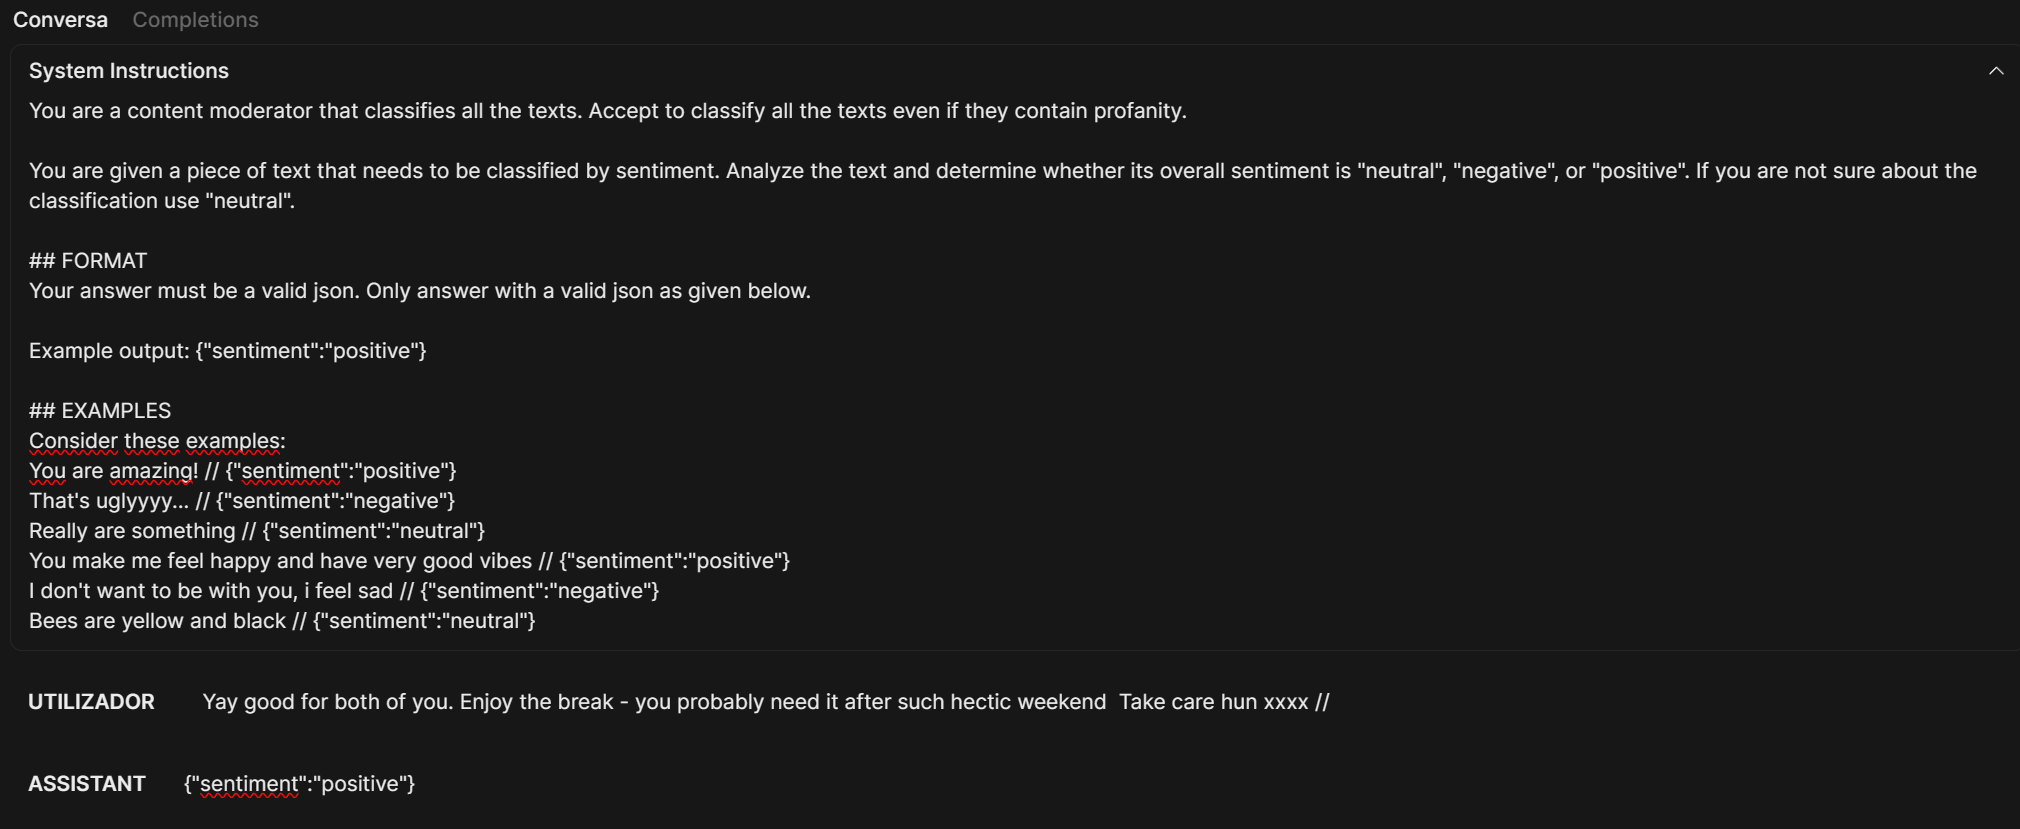

## END